In [1]:
folder.path = "C:/Users/paslanpatir/Desktop/TEZ_v2/"
source(paste0(folder.path,"pickleware/pickleware/TezV2_SetupCode.r"))
folder.path = "C:/Users/paslanpatir/Desktop/TEZ_v2/"

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.2.1     v purrr   0.3.3
v tibble  2.1.3     v dplyr   0.8.3
v tidyr   1.0.0     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::between()   masks data.table::between()
x dplyr::filter()    masks stats::filter()
x dplyr::first()     masks data.table::first()
x purrr::flatten()   masks jsonlite::flatten()
x dplyr::lag()       masks stats::lag()
x dplyr::last()      masks data.table::last()
x purrr::transpose() masks data.table::transpose()
Loading required package: igraph

Attaching package: 'igraph'

The following objects are masked from 'package:dplyr':

    as_data_frame, groups, union

The following objects are masked from 'package:purrr':

    compose, simplify

The following object is masked from 'package:tidyr':

    crossing

The following object is masked from 'package:tibble':

    as_data_fram

In [2]:
outputs.path = paste0(folder.path,"outputs/outputs_50_100/outputs_SampleRef_Dummy/Ad_coefvar/")
models.path = paste0(outputs.path,"models_Ad_coefvar/")
model.type = c("dummy_recovered")

In [3]:
outputs.path6 = paste0(folder.path,"outputs/outputs_50_100/outputs_SampleRef_Dummy/Ad_coefvar_mtry6/")
models.path6 = paste0(outputs.path6,"models_Ad_coefvar/")
model.type6 = c("dummy_recovered")

In [4]:
seed.focus = c(0,1,2,3,4,5,6,7,8,9,20)
rep.focus = c(1:10)
iter.focus = c(1:11)
sample.type = "Ad_coefvar"

# Importance Recovery

In [ ]:
for(s in seed.focus){
    for(r in rep.focus){
        for(i in iter.focus){
            model_Sub = readRDS(paste0(models.path,"model_",sample.type,"_",i,"_seed_",s,"_rep_",r,"_size_50",".rds"))
             #write_importance.rf(s,r,i,model_Sub,sample.type)
        }
    }
}

# Tree Info

In [5]:
model_Sub_trees = data.table()
for(s in seed.focus){
    for(r in rep.focus){
        for(i in 1){ # only first iteration
            model_Sub = readRDS(paste0(models.path,"model_",sample.type,"_",i,"_seed_",s,"_rep_",r,"_size_50",".rds"))

            for(t in 300){ # all of the trees
              model_trees = data.table(getTree(model_Sub, t, labelVar=TRUE))
              model_trees = model_trees[is.na(`split var`) == F]
              model_Sub_trees = rbind(model_Sub_trees
                                      ,data.table(model_trees,"tree" = t,"iter" = i,"rep" = r, "seed"= s))  
            }
        }
    }
}

In [7]:
model_Sub_trees6 = data.table()
for(s in seed.focus){
    for(r in rep.focus){
        for(i in 1){ # only first iteration
            model_Sub = readRDS(paste0(models.path6,"model_",sample.type,"_",i,"_seed_",s,"_rep_",r,"_size_50",".rds"))

            for(t in 300){ # all of the trees
              model_trees = data.table(getTree(model_Sub, t, labelVar=TRUE))
              model_trees = model_trees[is.na(`split var`) == F]
              model_Sub_trees6 = rbind(model_Sub_trees6
                                      ,data.table(model_trees,"tree" = t,"iter" = i,"rep" = r, "seed"= s))  
            }
        }
    }
}

In [ ]:
head(model_Sub_trees)

In [8]:
tree_table = model_Sub_trees[,.N,.(`split var`,seed)]
tree_table_pivot = dcast(tree_table, seed ~ `split var`, value.var = "N"  )
tree_table_pivot

seed,%-similar-wanted,budget-multiplier-dummy,density,density-multiplier-dummy,tick-limit,noise-dummy
<dbl>,<int>,<int>,<int>,<int>,<int>,<int>
0,27,19,24,26,32,23
1,43,25,27,19,17,23
2,35,25,31,22,19,19
3,37,31,28,22,27,15
4,33,28,21,24,24,20
5,37,24,29,23,21,24
6,28,25,31,18,19,30
7,45,19,29,26,21,14
8,47,22,19,26,17,20


In [11]:
tree_table_rep = model_Sub_trees[,.N,.(`split var`,seed,rep)]
tree_table_rep_pivot = dcast(tree_table_rep, rep +seed ~ `split var`, value.var = "N"  )
tree_table_rep_pivot[seed %in% c(4)]

rep,seed,%-similar-wanted,budget-multiplier-dummy,density,density-multiplier-dummy,tick-limit,noise-dummy
<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>
1,4,4,1,1,2,5,2
2,4,4,3,1,2,2,4
3,4,1,2,3,2,3,4
4,4,3,1,2,6,NA,NA
5,4,4,5,2,1,2,1
6,4,2,2,3,3,4,2
7,4,2,5,2,1,3,2
8,4,5,4,4,5,2,NA
9,4,5,2,1,1,1,2


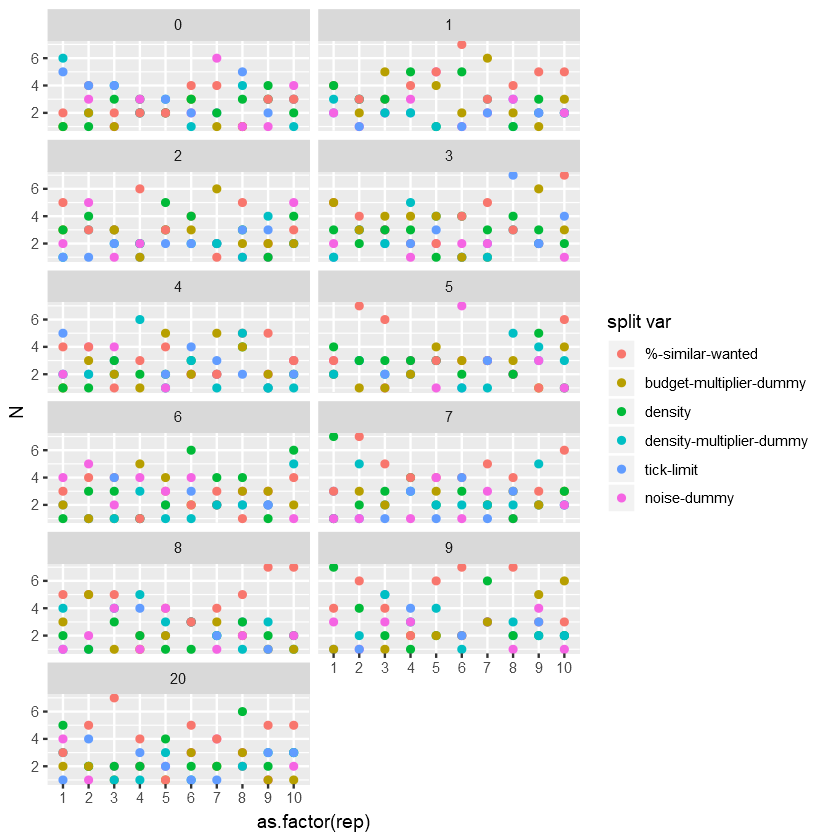

In [12]:
tree_table_rep = model_Sub_trees[,.N,.(`split var`,seed,rep)]
ggplot(data = tree_table_rep, aes(x = as.factor(rep), y = N, col = `split var` )) +
facet_wrap(~seed, ncol = 2) +
geom_point() 
#geom_vline( xintercept = c(5,7,10), size = 0.1)


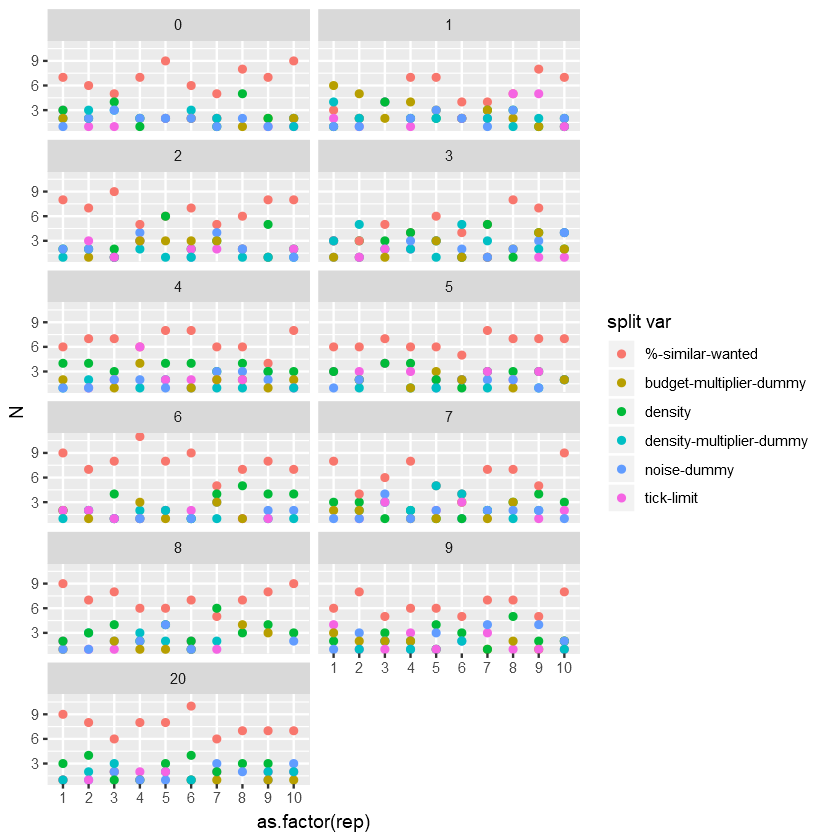

In [13]:
tree_table_rep.6 = model_Sub_trees6[,.N,.(`split var`,seed,rep)]
ggplot(data = tree_table_rep.6, aes(x = as.factor(rep), y = N, col = `split var` )) +
facet_wrap(~seed, ncol = 2) +
geom_point() 
#geom_vline( xintercept = c(5,7,10), size = 0.1)


# Pelin

In [ ]:
model_1 = readRDS(paste0(models.path,"model_",sample.type,"_",1,"_seed_",4,"_rep_",1,"_size_50",".rds"))

In [ ]:
model_2 = readRDS(paste0(models.path,"model_",sample.type,"_",1,"_seed_",1,"_rep_",1,"_size_50",".rds"))

In [ ]:
model_1_r = data.table(getTree(model_1, 9, labelVar=TRUE))
model_1_r = model_1_r[is.na(`split var`) == F]
model_1_r

In [ ]:
model_2_r = data.table(getTree(model_2, 5, labelVar=TRUE))
model_2_r = model_2_r[is.na(`split var`) == F]
model_2_r

In [ ]:
?getTree